# Exercise 2: Data Processing and Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


try:
    import otter
    grader = otter.Notebook()

except:

    %pip install otter-grader
    import otter
    grader = otter.Notebook()



Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [2]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [3]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [4]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate,maximumHeartRate)

40.0 296.5939695131042


In [5]:
#check('tests/q1.py')
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [6]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [7]:
print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [8]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [10]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_55070/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_55070/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [11]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [12]:
#check('tests/q2.py')
grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

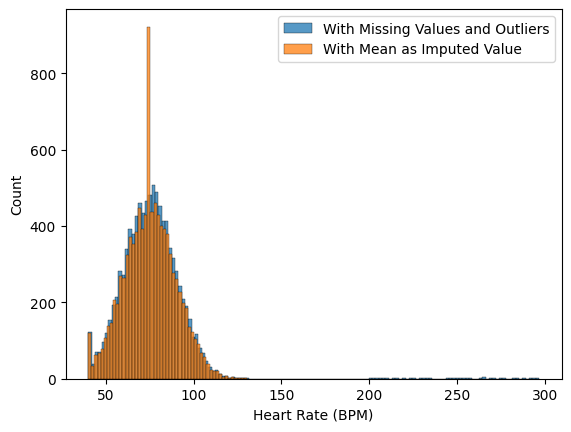

In [13]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

By removing outliers, our median will likely decrease (since we are removing the highest data values). When we use out unchanged table, our median value will likely be greater.

In [14]:
## coding cell to check the difference in median values 

medianHeartRateoriginal = smartwatch['Heart Rate (BPM)'].median()
medianHeartRatenooutliers = heartrateRows['Heart Rate (BPM)'].median()

print(medianHeartRateoriginal-medianHeartRatenooutliers)


0.07433851536120528


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [15]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()


maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [16]:
#check('tests/q4.py')
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

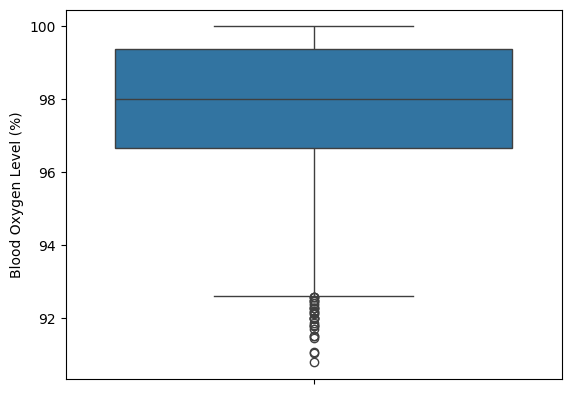

In [17]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

To handle the issue of missing values and outliers, I have chosen to use the imputation analysis method. I think it would be harder in this case to remove null values from specific columns since there are ID numbers attached to each, and we would also be removing other data. 

In [18]:
## use this space or additional cells to deal with the missing/outlier values. 


outlierBloodOxygenLevelrows = smartwatch[smartwatch['Blood Oxygen Level (%)'] < 92.5]
nullHeartRaterows = smartwatch[smartwatch['Blood Oxygen Level (%)'].isnull()]

outlierBloodOxygenLevelrows['Blood Oxygen Level (%)'] = meanBloodO2
nullBloodOxygenLevelrows= meanBloodO2

smartwatch_o2 = smartwatch['Blood Oxygen Level (%)']

##tried using Gen AI to write the code underneath, but it didn't seem to work

##smartwatch_o2 = smartwatch['Blood Oxygen Level (%)'].fillna(smartwatch['Blood Oxygen Level (%)'].mean())

##smartwatch_o2 = smartwatch['Blood Oxygen Level (%)'].fillna(smartwatch[(smartwatch['Heart Rate (BPM)'].isnull())]) & (smartwatch['Heart Rate (BPM)'] > 200)]


print(smartwatch_o2)

0       98.809650
1       98.532195
2       97.052954
3       96.894213
4       98.583797
          ...    
9995    98.931927
9996    95.773035
9997    97.945874
9998    98.401058
9999    98.475606
Name: Blood Oxygen Level (%), Length: 10000, dtype: float64


/tmp/ipykernel_55070/2853984168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierBloodOxygenLevelrows['Blood Oxygen Level (%)'] = meanBloodO2


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [19]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [20]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

Again, I will be using the imputation method. For the same reason as before, I believe it would be harder in this case to remove null values from specific columns since there are ID numbers attached to each.  

In [21]:
outlierStepCountrows = smartwatch_o2[(smartwatch['Step Count'] < 100) | (smartwatch['Step Count'] > 50000)]

print(outlierStepCountrows)


99       97.931180
245      97.182160
358      97.208981
485     100.000000
524      97.012952
           ...    
9942     95.046775
9947     96.897691
9948     97.277616
9971     99.319841
9993     96.385686
Name: Blood Oxygen Level (%), Length: 149, dtype: float64


In [22]:
## use this space or additional cells to address the missing or outlier data. 

##according to the National Institute of Health, less than 100 and greater than 50,000 steps per day are considered outliers/abnormal amounts of steps. (The code for this is in the coding box above)

outlierStepCountrows = smartwatch_o2[(smartwatch['Step Count'] < 100) | (smartwatch['Step Count'] > 50000)]
nullStepCountrows = smartwatch_o2[smartwatch['Step Count'].isnull()]

outlierStepCountrows['Step Count'] = meanSteps
nullStepCountrows['Step Count'] = meanSteps

smartwatch_steps = smartwatch['Step Count']

print(smartwatch_steps)

0        5450.390578
1         727.601610
2        2826.521994
3       13797.338044
4       15679.067648
            ...     
9995     2948.491953
9996     4725.623070
9997     2571.492060
9998     3364.788855
9999      544.696104
Name: Step Count, Length: 10000, dtype: float64


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [23]:
minSleep = smartwatch['Sleep Duration (hours)'].min()
print(minSleep)


TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [27]:
for minSleep in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(minSleep)  ## first try to see if it can be converted to a number
    except:
        print(f"Cannot convert {minSleep} to a number")  ## if it can't be converted print it to screen 

        ##used chat gpt to figure out what to write in the last line

Cannot convert ERROR to a number


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [25]:
errorTable = smartwatch[smartwatch['Sleep Duration (hours)'] == 'ERROR']
print(errorTable)

## had to change smartwatch_steps to just smartwatch since it gave me an error message

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
62     3068.0        115.078288               99.928041   1918.372142   
71     3041.0         64.799778               94.743857   4613.859266   
81     4499.0         41.709895               96.857347   1413.015778   
92     2021.0         70.243810               97.171134   2336.583406   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

     Sleep Duration (hours) Activity Level Stress Level  
2                     ERROR  Highly Active            5  
62     

Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [28]:
errorTable['Sleep Duration (hours)'] = np.nan

print(errorTable)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
62     3068.0        115.078288               99.928041   1918.372142   
71     3041.0         64.799778               94.743857   4613.859266   
81     4499.0         41.709895               96.857347   1413.015778   
92     2021.0         70.243810               97.171134   2336.583406   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

      Sleep Duration (hours) Activity Level Stress Level  
2                        NaN  Highly Active            5  
62   

/tmp/ipykernel_55070/2212040875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [100]:
## create a copy of the table 

smartwatch_o2['Sleep Duration (hours)'] = pd.to_numeric(smartwatch['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep = smartwatch_o2['Sleep Duration (hours)']

print(smartwatch_sleep)

0       7.167236
1       6.538239
2            NaN
3       7.367790
4            NaN
          ...   
9995    7.402749
9996    6.382166
9997    6.916549
9998    5.691234
9999    5.691001
Name: Sleep Duration (hours), Length: 10000, dtype: float64


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [101]:

minSleep = smartwatch_sleep.min()
maxSleep = smartwatch_sleep.max()
meanSleep = smartwatch_sleep.mean()
    
print(minSleep, maxSleep, meanSleep)

-0.1944527906201543 12.140232872862926 6.505462918406444


In [63]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 
I will be using the imputation method for this question as well. It seems like the best option for this data set since simply removing outliers and missing data could result in the loss of quite a lot of data.  



In [70]:
## use this space or additional cells to address the missing or outlier data. 

outliersmartwatch_sleep = smartwatch_sleep[smartwatch_o2['Sleep Duration (hours)'] < 0 ]
nullsmartwatch_sleep = smartwatch_sleep[smartwatch_o2['Sleep Duration (hours)'].isnull()]

smartwatch_sleep.loc[outliersmartwatch_sleep.index, 'Sleep Duration (hours)'] = meanSleep ##used chat gpt for this part
smartwatch_sleep.loc[nullsmartwatch_sleep.index, 'Sleep Duration (hours)'] = meanSleep

smartwatch_updated_sleep = smartwatch_sleep

print(smartwatch_updated_sleep)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [65]:
for minstresslevel in smartwatch['Stress Level'].unique():
    try:
        numericVal = float(minstresslevel)
    except:
        print(f"Cannot convert {minstresslevel} to a number")

        ##used chat gpt to figure out what to write in the last line

Cannot convert Very High to a number


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 

I have decided to simply exclude the 'Very High' values, by renaming them as null values. Since I don't know what is meant by 'Very High', I can't confidently assign a numerical value in it's place. 

In [66]:
## cell to deal with 'Very High' value

smartwatch['Stress Level'] = pd.to_numeric(smartwatch['Stress Level'], errors= 'coerce')

smartwatch_stress = smartwatch['Stress Level']

print(smartwatch_stress)


0       1.0
1       5.0
2       5.0
3       3.0
4       6.0
       ... 
9995    7.0
9996    2.0
9997    4.0
9998    8.0
9999    5.0
Name: Stress Level, Length: 10000, dtype: float64


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [67]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [87]:
## I had to use chat gpt again to figure out how to write .loc and .index correctly

## Highly Active 
highlyActive = smartwatch[(smartwatch['Activity Level'] == 'Highly Active') | (smartwatch['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
smartwatch.loc[highlyActive.index, 'Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
smartwatch.loc[highlyActive.index, 'Activity Level'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch[(smartwatch['Activity Level'] == 'Active') | (smartwatch['Activity Level'] == 'Actve')]
smartwatch.loc[active.index, 'Activity Level'] = 'Active'
smartwatch.loc[active.index, 'Activity Level'] = 2

## Sedentary 
sedentary = smartwatch[(smartwatch['Activity Level'] == 'Sedentary') | (smartwatch['Activity Level'] == 'Seddentary')]
smartwatch.loc[sedentary.index, 'Activity Level'] = 'Sedentary'
smartwatch.loc[sedentary.index, 'Activity Level'] = 3

final_table = pd.concat([smartwatch[smartwatch['Activity Level'] == 1], smartwatch[smartwatch['Activity Level'] == 2], smartwatch[smartwatch['Activity Level'] == 3], smartwatch[smartwatch['Activity Level'].isnull()]])
print(final_table)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
...       ...               ...                     ...           ...   
9842   2108.0         71.152455               98.585987   1480.777008   
9845   4203.0         91.417098               95.383875   1238.788704   
9867   2674.0         69.075313               99.067026   2759.328767   
9898   1409.0         79.941705               98.716816    619.353083   
9991   4289.0         91.381582               95.741838   3930.126338   

     Sleep Duration (hours) Activity Level  Stress Level  
0         7.167235622316564              1           1.0  
1    

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [88]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              249
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [89]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9751 non-null   float64
dtypes: float64(5), object(2)
memory usage: 625.0+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

As the parameter gets larger, it becomes harder to see individual data points. 

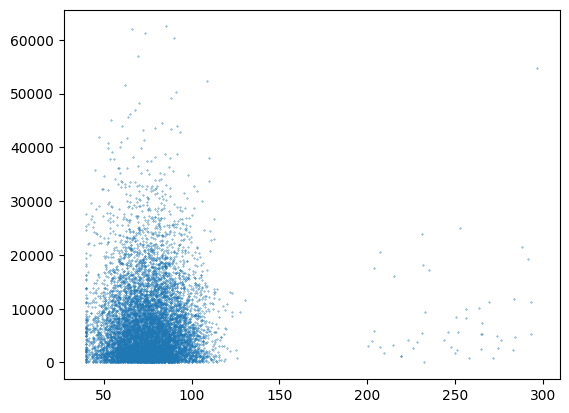

In [90]:
plt.scatter(smartwatch['Heart Rate (BPM)'], smartwatch['Step Count'], s=0.1)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The second figure is much more symmetric and spread out, since we are zooming in on a specific part of the graph. We no longer see the outlier data points.

In [91]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

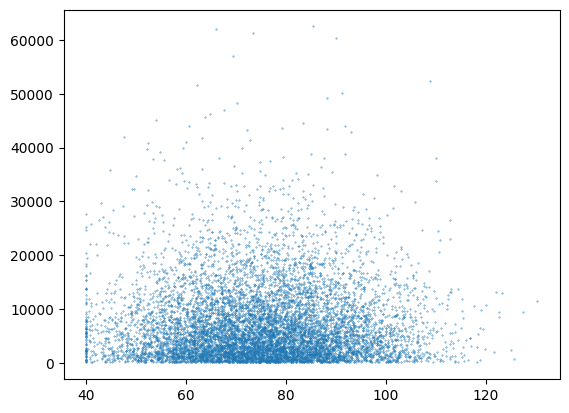

In [92]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Step Count'], s=0.1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: ylabel='Activity Level'>

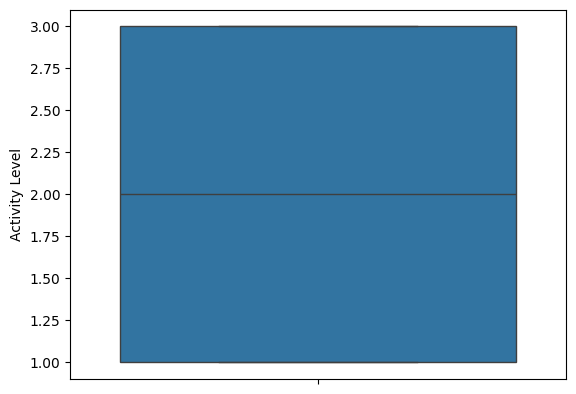

In [93]:
## Visualization 

sns.boxplot(smartwatch['Activity Level'])



In [94]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = smartwatch[smartwatch['Activity Level'] == 'Sedentary']  ## sedentary rows
act = smartwatch[smartwatch['Activity Level'] == 'Active'] ## active rows
hact = smartwatch[smartwatch['Activity Level'] == 'highlyActive'] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: nan, p-value: nan


/tmp/ipykernel_55070/2393722859.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


Is there significant difference between the groups' step counts?  

ANSWER:

I am not able to find the p-value, because of issues with earlier questions. I will be sure to finish this once I have figured it out!
If the p-value is less than our alpha level of .05, than we will reject the null (meaning there is a significant difference). However, if the p-value is above .05, than we will fail to reject the null (meaning there is not significant evidence of a difference).

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

When presenting my findings from this dataset, I would be as transparent as possible about how the data was cleaned, and why certain decisions were made about null values and outliers. I would also be sure to acknowledge that this data is only coming from individuals who have access to the smartwatches, and that that could possibly reinforce existing biases. Additionally, if raw data was requested in order to better understand where the findings came from, I would be sure to provide them. 